In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar


In [6]:
data=pd.read_csv("autos.csv",encoding = "latin-1")

In [7]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
data.describe()

,price,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,3.715380e+05,371537.000000,371538.000000,371537.000000,371537.0,371537.000000
mean,1.729544e+04,2004.577883,115.548840,5.734473,0.0,50820.666402
std,3.587905e+06,92.865496,192.137238,3.712383,0.0,25799.080292
min,0.000000e+00,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1.150000e+03,1999.000000,70.000000,3.000000,0.0,30459.000000
50%,2.950000e+03,2003.000000,105.000000,6.000000,0.0,49610.000000
75%,7.200000e+03,2008.000000,150.000000,9.000000,0.0,71546.000000
max,2.147484e+09,9999.000000,20000.000000,12.000000,0.0,99998.000000


In [8]:
data.corr()

C:\Users\sivas\AppData\Local\Temp\ipykernel_13132\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
price,1.000000,-0.000182,0.006850,-0.000635,-0.002826,NaN,-0.003164
yearOfRegistration,-0.000182,1.000000,0.000351,-0.055319,-0.011607,NaN,-0.001652
powerPS,0.006850,0.000351,1.000000,-0.010738,0.044358,NaN,0.027113
kilometer,-0.000635,-0.055319,-0.010738,1.000000,0.001838,NaN,-0.026694
monthOfRegistration,-0.002826,-0.011607,0.044358,0.001838,1.000000,NaN,0.014963
nrOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postalCode,-0.003164,-0.001652,0.027113,-0.026694,0.014963,NaN,1.000000


In [9]:
#dropping unwanted columns
print(data.seller.unique())
print(data.offerType.unique())
print(data.abtest.unique())
print(data.nrOfPictures.unique())

['privat' 'gewerblich']
['Angebot' 'Gesuch']
['test' 'control']
[0]


In [10]:
data.drop(["name","seller","offerType","nrOfPictures","lastSeen","dateCreated","postalCode","dateCrawled"],axis="columns",inplace=True)

In [11]:
data

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN


# Data Cleaning

In [12]:
data_car = data.copy()

# Filter bad data
data_car = data_car[
    (data_car["yearOfRegistration"].between(1945, 2017, inclusive=True)) &
    (data_car["powerPS"].between(100, 500, inclusive=True)) &
    (data_car["price"].between(100, 200000, inclusive=True))] 

C:\Users\sivas\AppData\Local\Temp\ipykernel_13132\2471708153.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  (data_car["yearOfRegistration"].between(1945, 2017, inclusive=True)) &
C:\Users\sivas\AppData\Local\Temp\ipykernel_13132\2471708153.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  (data_car["powerPS"].between(100, 500, inclusive=True)) &
C:\Users\sivas\AppData\Local\Temp\ipykernel_13132\2471708153.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  (data_car["price"].between(100, 200000, inclusive=True))]


In [13]:
#checking for null values
data_car.isnull().any()

price                  False
abtest                 False
vehicleType             True
yearOfRegistration     False
gearbox                 True
powerPS                False
model                   True
kilometer              False
monthOfRegistration    False
fuelType                True
brand                  False
notRepairedDamage       True
dtype: bool

In [14]:
data_car.isnull().sum()

price                      0
abtest                     0
vehicleType             9739
yearOfRegistration         0
gearbox                 2603
powerPS                    0
model                   7613
kilometer                  0
monthOfRegistration        0
fuelType               10398
brand                      0
notRepairedDamage      26279
dtype: int64

In [15]:
data_car["gearbox"].value_counts()

manuell      144786
automatik     61927
Name: gearbox, dtype: int64

In [16]:
data_car['gearbox'].fillna(value='manuell', inplace=True)

In [17]:
data_car["gearbox"].isnull().sum()

0

In [18]:
data_car["notRepairedDamage"].value_counts()

nein    165567
ja       17470
Name: notRepairedDamage, dtype: int64

In [19]:
data_car["notRepairedDamage"].isnull().sum()

26279

In [20]:
data_car["notRepairedDamage"].fillna("nein",inplace = True)

In [21]:
data_car["notRepairedDamage"].isnull().sum()


0

In [22]:
data_car["fuelType"].value_counts()

benzin     111258
diesel      83182
lpg          4048
cng           262
hybrid        113
andere         36
elektro        19
Name: fuelType, dtype: int64

In [23]:
data_car["fuelType"].fillna("benzin",inplace = True)

In [24]:
data_car.isnull().sum()

price                     0
abtest                    0
vehicleType            9739
yearOfRegistration        0
gearbox                   0
powerPS                   0
model                  7613
kilometer                 0
monthOfRegistration       0
fuelType                  0
brand                     0
notRepairedDamage         0
dtype: int64

In [25]:
data_car["vehicleType"].value_counts()

limousine     68924
kombi         54258
bus           21809
cabrio        16977
coupe         15303
suv           12498
kleinwagen     8482
andere         1326
Name: vehicleType, dtype: int64

In [26]:
#we can fill according to fueltype values
data_car.groupby("fuelType")["vehicleType"].value_counts()

fuelType  vehicleType
andere    limousine          9
          kombi              8
          andere             4
          bus                4
          suv                4
          cabrio             2
          kleinwagen         2
          coupe              1
benzin    limousine      44398
          kombi          22911
          cabrio         15226
          coupe          12519
          bus             7413
          kleinwagen      6805
          suv             4072
          andere           710
cng       bus              118
          kombi             94
          limousine         25
          andere             7
          kleinwagen         3
          cabrio             1
          coupe              1
          suv                1
diesel    kombi          30254
          limousine      23032
          bus            13833
          suv             7859
          coupe           2484
          kleinwagen      1604
          cabrio          1552
          andere 

In [27]:
data_car["vehicleType"].fillna("blank",inplace = True)

In [28]:
data_car["vehicleType"].isnull().sum()


0

In [29]:
len(data_car["model"].unique())

234

In [30]:
data_car["model"].value_counts()

3er        18142
andere     15258
golf       14643
a4          9156
passat      8401
           ...  
kalos          1
agila          1
cuore          1
picanto        1
sandero        1
Name: model, Length: 233, dtype: int64

In [31]:
data_car["model"].fillna("3er",inplace =True)

In [32]:
data_car.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,test,coupe,2011,manuell,190,3er,125000,5,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein
5,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja
6,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein
8,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,nein


In [30]:
data_car.describe()

,price,yearOfRegistration,powerPS,monthOfRegistration
count,209320.000000,209320.000000,209320.000000,209320.000000
mean,8021.273634,2004.254066,154.336413,6.091577
std,9292.760052,6.508539,54.410931,3.550213
min,100.000000,1947.000000,100.000000,0.000000
25%,2290.000000,2000.000000,116.000000,3.000000
50%,5142.500000,2005.000000,140.000000,6.000000
75%,10600.000000,2009.000000,174.000000,9.000000
max,200000.000000,2017.000000,500.000000,12.000000


In [33]:

#checking for null values again in our data
data_car.isnull().sum()

price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

# Data Vizualization

abtest
test       108137
control    101179
Name: abtest, dtype: int64


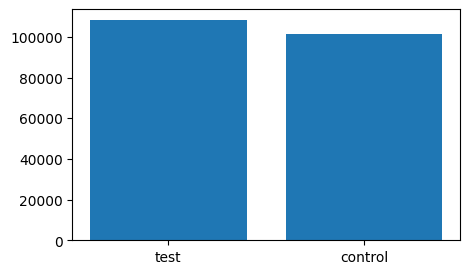

vehicleType
limousine    68924
kombi        54258
bus          21809
cabrio       16977
coupe        15303
Name: vehicleType, dtype: int64


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (9).

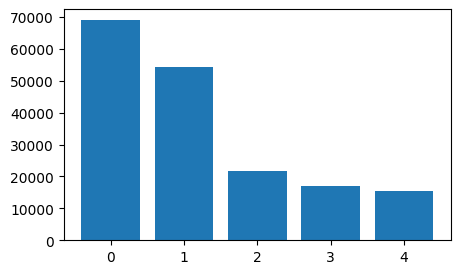

In [34]:
cat_val = ["abtest","vehicleType", "brand", "model", "gearbox","fuelType", "notRepairedDamage"]

for i,col in enumerate(cat_val):
    v=data_car[col].unique()
    g = data_car.groupby(by=col)[col].count().sort_values(ascending=False)
    r=range(min(len(v),5))
    print(g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r,g.head())
    plt.xticks(r, g.index)
    plt.show()

array([[<AxesSubplot: xlabel='price', ylabel='price'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='price'>,
        <AxesSubplot: xlabel='powerPS', ylabel='price'>,
        <AxesSubplot: xlabel='kilometer', ylabel='price'>],
       [<AxesSubplot: xlabel='price', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='powerPS', ylabel='yearOfRegistration'>,
        <AxesSubplot: xlabel='kilometer', ylabel='yearOfRegistration'>],
       [<AxesSubplot: xlabel='price', ylabel='powerPS'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='powerPS'>,
        <AxesSubplot: xlabel='powerPS', ylabel='powerPS'>,
        <AxesSubplot: xlabel='kilometer', ylabel='powerPS'>],
       [<AxesSubplot: xlabel='price', ylabel='kilometer'>,
        <AxesSubplot: xlabel='yearOfRegistration', ylabel='kilometer'>,
        <AxesSubplot: xlabel='powerPS', ylabel='kilometer'>,
        <AxesSubplot: xlabel

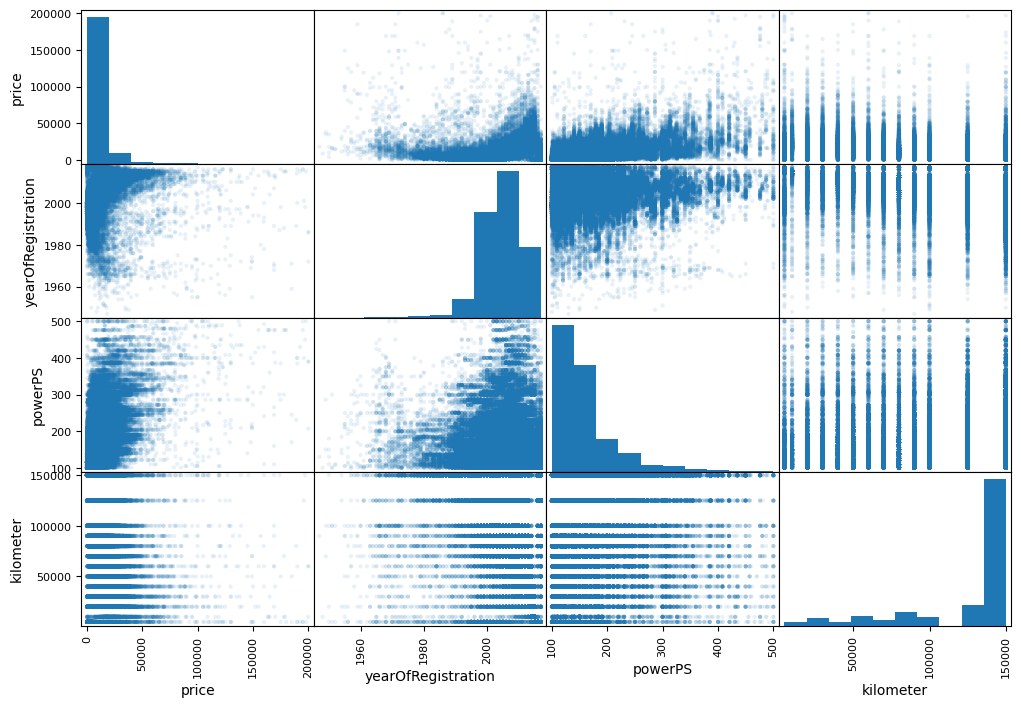

In [35]:
from pandas.plotting import scatter_matrix
num_attributes = ["price", "yearOfRegistration", "powerPS", "kilometer"]
%matplotlib inline
pd.plotting.scatter_matrix(data_car[num_attributes], figsize = (12,8), alpha = 0.1)

<AxesSubplot: >

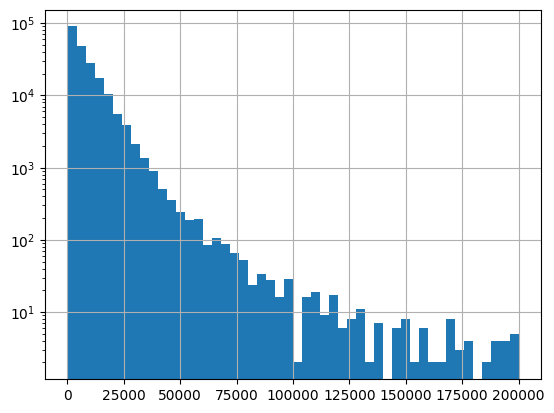

In [36]:
data_car["price"].hist(bins = 50, log = True)

In [37]:

data_car.corr()

C:\Users\sivas\AppData\Local\Temp\ipykernel_13132\3711210416.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_car.corr()


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
price,1.000000,0.377909,0.518035,-0.521576,0.035782
yearOfRegistration,0.377909,1.000000,0.092983,-0.372132,0.029031
powerPS,0.518035,0.092983,1.000000,-0.097030,0.025116
kilometer,-0.521576,-0.372132,-0.097030,1.000000,-0.014486
monthOfRegistration,0.035782,0.029031,0.025116,-0.014486,1.000000


C:\Users\sivas\AppData\Local\Temp\ipykernel_13132\3286683497.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_car.corr()


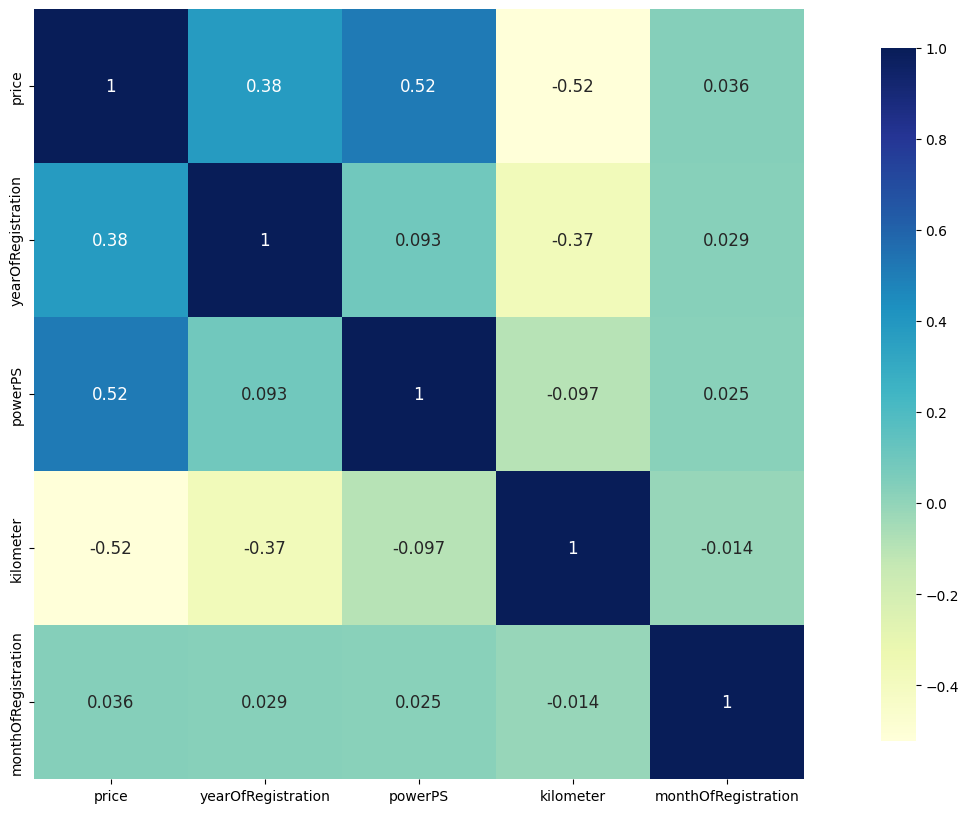

In [38]:
def plot_correlation_map( df ):
    corr = data_car.corr()
    _ , ax = plt.subplots( figsize =( 20 , 10 ) )
    #cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = "YlGnBu",
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(cat_val)


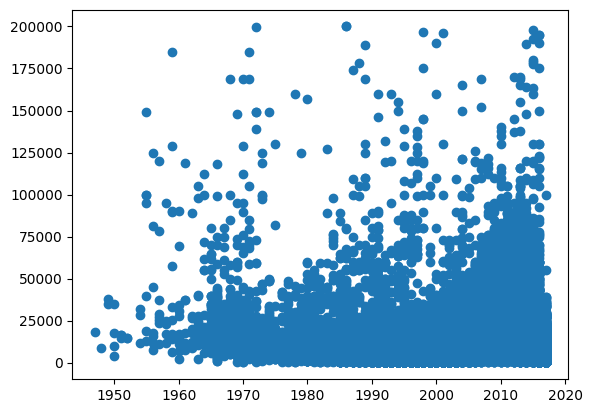

In [39]:
plt.scatter(data_car['yearOfRegistration'],data_car['price'])


# Encoding categorical values

In [40]:
data_car.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,test,coupe,2011,manuell,190,3er,125000,5,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein
5,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja
6,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein
8,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,nein


In [41]:
data_car.dtypes

price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dtype: object

In [42]:
from sklearn.preprocessing import LabelEncoder
category_col=["abtest","vehicleType","fuelType","gearbox","notRepairedDamage","brand","model"]
mapping_dict ={} 
labelEncoder=LabelEncoder()
for col in category_col: 
    data_car[col] = labelEncoder.fit_transform(data_car[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'abtest': {'control': 0, 'test': 1}, 'vehicleType': {'andere': 0, 'blank': 1, 'bus': 2, 'cabrio': 3, 'coupe': 4, 'kleinwagen': 5, 'kombi': 6, 'limousine': 7, 'suv': 8}, 'fuelType': {'andere': 0, 'benzin': 1, 'cng': 2, 'diesel': 3, 'elektro': 4, 'hybrid': 5, 'lpg': 6}, 'gearbox': {'automatik': 0, 'manuell': 1}, 'notRepairedDamage': {'ja': 0, 'nein': 1}, 'brand': {'alfa_romeo': 0, 'audi': 1, 'bmw': 2, 'chevrolet': 3, 'chrysler': 4, 'citroen': 5, 'dacia': 6, 'daewoo': 7, 'daihatsu': 8, 'fiat': 9, 'ford': 10, 'honda': 11, 'hyundai': 12, 'jaguar': 13, 'jeep': 14, 'kia': 15, 'lada': 16, 'lancia': 17, 'land_rover': 18, 'mazda': 19, 'mercedes_benz': 20, 'mini': 21, 'mitsubishi': 22, 'nissan': 23, 'opel': 24, 'peugeot': 25, 'porsche': 26, 'renault': 27, 'rover': 28, 'saab': 29, 'seat': 30, 'skoda': 31, 'smart': 32, 'sonstige_autos': 33, 'subaru': 34, 'suzuki': 35, 'toyota': 36, 'trabant': 37, 'volkswagen': 38, 'volvo': 39}, 'model': {'100': 0, '145': 1, '147': 2, '156': 3, '159': 4, '1_reihe':

In [43]:
data_car.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,1,4,2011,1,190,11,125000,5,3,1,0
2,9800,1,8,2004,0,163,114,125000,8,3,14,1
5,650,1,7,1995,1,102,11,150000,10,1,2,0
6,2200,1,3,2004,1,109,8,150000,8,1,25,1
8,14500,0,2,2014,1,125,58,30000,8,1,10,1


# model building

In [44]:
#splitting dependent and independent varibles
x=data_car.iloc[:,1:].values
x

array([[   1,    4, 2011, ...,    3,    1,    0],
       [   1,    8, 2004, ...,    3,   14,    1],
       [   1,    7, 1995, ...,    1,    2,    0],
       ...,
       [   1,    2, 1996, ...,    3,   38,    1],
       [   1,    6, 2002, ...,    3,   38,    1],
       [   0,    7, 2013, ...,    1,    2,    1]], dtype=int64)

In [45]:
y=data_car.iloc[:,0:1].values
y

array([[18300],
       [ 9800],
       [  650],
       ...,
       [ 9200],
       [ 3400],
       [28990]], dtype=int64)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.96728434, -0.6463322 ,  1.0364769 , ...,  0.97557459,
        -1.22291545, -3.31375875],
       [ 0.96728434,  1.29575632, -0.03903582, ...,  0.97557459,
        -0.28513236,  0.30177212],
       [ 0.96728434,  0.81023419, -1.42183788, ..., -0.79018349,
        -1.15077829, -3.31375875],
       ...,
       [ 0.96728434, -1.61737645, -1.26819321, ...,  0.97557459,
         1.4461595 ,  0.30177212],
       [ 0.96728434,  0.32471206, -0.34632517, ...,  0.97557459,
         1.4461595 ,  0.30177212],
       [-1.03382218,  0.81023419,  1.34376625, ..., -0.79018349,
        -1.15077829,  0.30177212]])

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [48]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()
mr.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred_mr=mr.predict(x_test)
y_pred_mr

array([[1830.79756317],
       [4456.45618734],
       [2068.7685042 ],
       ...,
       [9888.1802138 ],
       [1141.4317942 ],
       [-475.01042179]])

In [50]:
y_test

array([[ 1899],
       [ 6500],
       [ 2500],
       ...,
       [13700],
       [ 2200],
       [  777]], dtype=int64)

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_mr)

0.5395325023496749

In [52]:
y_test[10:15]

array([[ 4000],
       [ 9990],
       [ 4000],
       [12500],
       [11000]], dtype=int64)

In [53]:
y_pred_mr[10:15]

array([[ 5438.95858978],
       [11086.35744194],
       [ 6595.52400828],
       [10039.24140151],
       [ 6382.10912458]])

In [54]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(criterion='mse',random_state=0) #mse is mean square error
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

tree_rmse = np.sqrt(y_pred_dt)
tree_rmse
r2_score(y_test,y_pred_dt)

c:\Users\sivas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


0.7409931186883298

In [55]:
y_test[5:8]

array([[10400],
       [ 1700],
       [19900]], dtype=int64)

In [56]:
y_pred_dt[5:8]

array([15699.,  2000., 19890.])

In [57]:
#import library for random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42, n_jobs =-1, max_depth = 30)
#n_estimators no of decision trees

y_pred_rf=dt.predict(x_test)
r2_score(y_test,y_pred_rf)

0.7409931186883298

In [59]:
from joblib import dump
dump(rf,"rf.sav")

['rf.sav']